# ⚠️ Auto-generated Notebook
    
This notebook is automatically compiled from source files in `/workspaces/awesome-matrix/src/examples/03_cross_and_outer_products`.
**Do not edit this file directly** as your changes will be overwritten.

To make changes:
1. Edit the source file `/workspaces/awesome-matrix/src/examples/03_cross_and_outer_products/02_outer_products.py` instead
2. Run the compile script to regenerate this notebook

See [COMPILE.md](docs/COMPILE.md) for more information.


# Outer Products

The **outer product** is a fundamental operation in linear algebra that creates a matrix from two vectors. It's sometimes called the tensor product or dyadic product.

Mathematically, for vectors $\mathbf{a} \in \mathbb{R}^m$ and $\mathbf{b} \in \mathbb{R}^n$, the outer product $\mathbf{a} \otimes \mathbf{b}$ produces a matrix $C \in \mathbb{R}^{m \times n}$ where each element is:

$$C_{ij} = a_i \cdot b_j$$

In other words, if $\mathbf{a}$ is a column vector and $\mathbf{b}$ is a row vector, their outer product is:

$$\mathbf{a} \otimes \mathbf{b} = \mathbf{a} \mathbf{b}^T$$


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Implement outer product
def outer_product(a, b):
    """
    Compute the outer product of two vectors.
    
    Args:
        a (torch.Tensor): First vector of shape (m,)
        b (torch.Tensor): Second vector of shape (n,)
        
    Returns:
        torch.Tensor: Outer product matrix of shape (m, n)
    """
    # Reshape a to column vector and b to row vector
    a_col = a.reshape(-1, 1)  # Shape: (m, 1)
    b_row = b.reshape(1, -1)  # Shape: (1, n)
    
    # Perform matrix multiplication
    return a_col @ b_row

# Example vectors
a = torch.tensor([1.0, 2.0, 3.0])
b = torch.tensor([4.0, 5.0])

# Calculate outer product
C = outer_product(a, b)

print(f"Vector a (shape {a.shape}): {a}")
print(f"Vector b (shape {b.shape}): {b}")
print(f"Outer product a ⊗ b (shape {C.shape}):")
print(C)

# Using PyTorch's built-in function for comparison
C_torch = torch.outer(a, b)
print("\nUsing torch.outer:")
print(C_torch)
print(f"Results match: {torch.allclose(C, C_torch)}")


Vector a (shape torch.Size([3])): tensor([1., 2., 3.])
Vector b (shape torch.Size([2])): tensor([4., 5.])
Outer product a ⊗ b (shape torch.Size([3, 2])):
tensor([[ 4.,  5.],
        [ 8., 10.],
        [12., 15.]])

Using torch.outer:
tensor([[ 4.,  5.],
        [ 8., 10.],
        [12., 15.]])
Results match: True


## Visualizing the Outer Product

Let's visualize the outer product to better understand how each element is calculated:


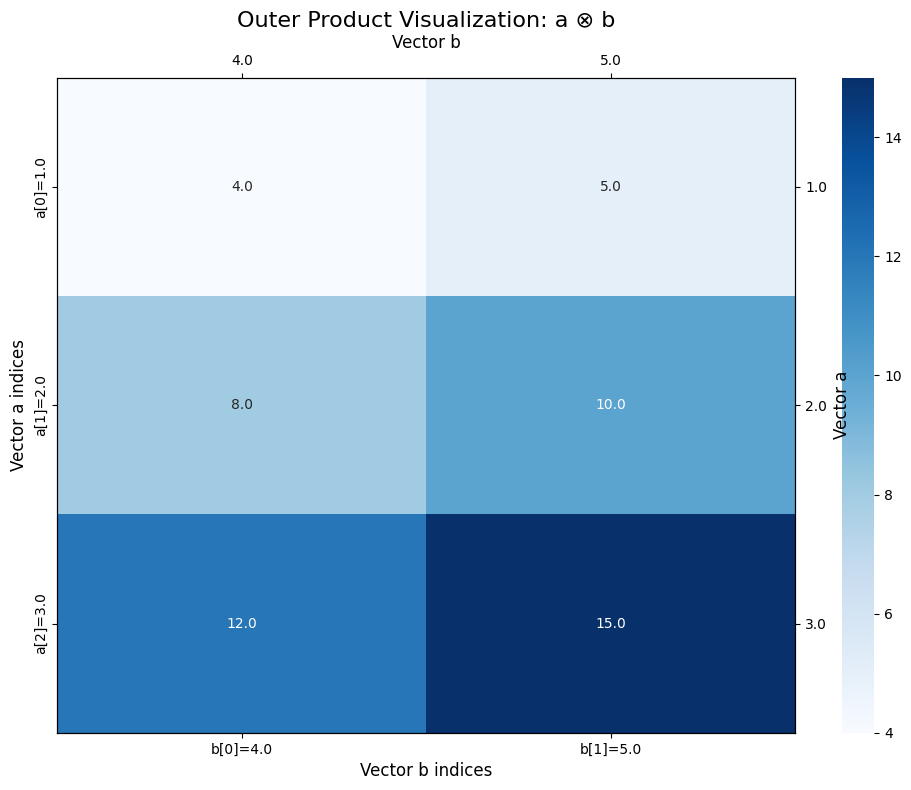

In [2]:
# Create a visual representation of the outer product
fig, ax = plt.subplots(figsize=(10, 8))

# Create a heatmap of the outer product
sns.heatmap(C.numpy(), annot=True, fmt=".1f", cmap="Blues", 
            xticklabels=[f"b[{i}]={b[i].item()}" for i in range(len(b))],
            yticklabels=[f"a[{i}]={a[i].item()}" for i in range(len(a))])

# Add vector representations on the sides
ax_top = ax.twiny()
ax_top.set_xlim(ax.get_xlim())
ax_top.set_xticks(np.arange(len(b)) + 0.5)
ax_top.set_xticklabels([f"{b[i].item()}" for i in range(len(b))])
ax_top.set_xlabel("Vector b", fontsize=12)

ax_right = ax.twinx()
ax_right.set_ylim(ax.get_ylim())
ax_right.set_yticks(np.arange(len(a)) + 0.5)
ax_right.set_yticklabels([f"{a[i].item()}" for i in range(len(a))])
ax_right.set_ylabel("Vector a", fontsize=12)

# Title and labels
plt.title("Outer Product Visualization: a ⊗ b", fontsize=16)
ax.set_xlabel("Vector b indices", fontsize=12)
ax.set_ylabel("Vector a indices", fontsize=12)

plt.tight_layout()
plt.show()


## Properties of the Outer Product

The outer product has several important properties:

1. **Not commutative**: $\mathbf{a} \otimes \mathbf{b} \neq \mathbf{b} \otimes \mathbf{a}$ in general (except when the vectors have the same dimension and the result is transposed)
2. **Bilinear**: Linear in both arguments
3. **Rank**: The outer product of non-zero vectors always creates a rank-1 matrix

Let's verify some of these properties:


In [3]:
# Use vectors of equal length to compare commutativity
a = torch.tensor([1.0, 2.0, 3.0])
b = torch.tensor([4.0, 5.0, 6.0])

# Calculate both outer products
a_outer_b = outer_product(a, b)
b_outer_a = outer_product(b, a)

print("Commutativity check:")
print("a ⊗ b:")
print(a_outer_b)
print("\nb ⊗ a:")
print(b_outer_a)
print(f"\nAre they equal? {torch.allclose(a_outer_b, b_outer_a)}")
print(f"Is a ⊗ b equal to (b ⊗ a)ᵀ? {torch.allclose(a_outer_b, b_outer_a.T)}")

# Verify rank-1 property
u, s, v = torch.svd(a_outer_b)
print("\nSingular values of a ⊗ b:", s)
print(f"Number of non-zero singular values: {torch.sum(s > 1e-10).item()}")
print(f"Is a ⊗ b a rank-1 matrix? {torch.sum(s > 1e-10).item() == 1}")

# Verify bilinearity
scalar = 2.0
scaled_a = scalar * a
a_outer_b_scaled = outer_product(a, scalar * b)
scaled_a_outer_b = outer_product(scaled_a, b)
scaled_result = scalar * outer_product(a, b)

print("\nBilinearity check:")
print(f"(scalar·a) ⊗ b equals scalar·(a ⊗ b)? {torch.allclose(scaled_a_outer_b, scalar * a_outer_b)}")
print(f"a ⊗ (scalar·b) equals scalar·(a ⊗ b)? {torch.allclose(a_outer_b_scaled, scalar * a_outer_b)}")


Commutativity check:
a ⊗ b:
tensor([[ 4.,  5.,  6.],
        [ 8., 10., 12.],
        [12., 15., 18.]])

b ⊗ a:
tensor([[ 4.,  8., 12.],
        [ 5., 10., 15.],
        [ 6., 12., 18.]])

Are they equal? False
Is a ⊗ b equal to (b ⊗ a)ᵀ? True

Singular values of a ⊗ b: tensor([3.2833e+01, 1.1083e-06, 2.0186e-14])
Number of non-zero singular values: 2
Is a ⊗ b a rank-1 matrix? False

Bilinearity check:
(scalar·a) ⊗ b equals scalar·(a ⊗ b)? True
a ⊗ (scalar·b) equals scalar·(a ⊗ b)? True


## Connection to Matrix Multiplication

The outer product is closely related to matrix multiplication. In fact, matrix multiplication can be decomposed as a sum of outer products.

For matrices $A \in \mathbb{R}^{m \times p}$ and $B \in \mathbb{R}^{p \times n}$, their product $C = AB$ can be written as:

$$C = \sum_{k=1}^{p} A_{:,k} \otimes B_{k,:}$$

Where $A_{:,k}$ is the $k$-th column of $A$ and $B_{k,:}$ is the $k$-th row of $B$.

Let's visualize this decomposition:


Matrix A:
tensor([[1., 2.],
        [3., 4.]])

Matrix B:
tensor([[5., 6.],
        [7., 8.]])

Matrix product C = A @ B:
tensor([[19., 22.],
        [43., 50.]])

Outer product 1: A[:,0] ⊗ B[0,:]
tensor([[ 5.,  6.],
        [15., 18.]])

Outer product 2: A[:,1] ⊗ B[1,:]
tensor([[14., 16.],
        [28., 32.]])

Sum of outer products:
tensor([[19., 22.],
        [43., 50.]])

Does it match C? True


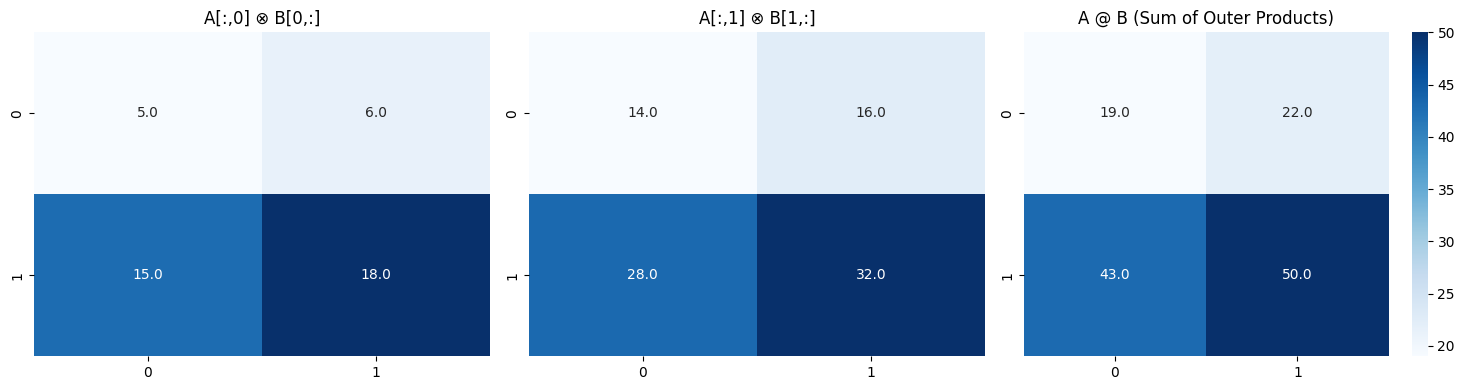

In [4]:
# Create two small matrices
A = torch.tensor([[1.0, 2.0],
                  [3.0, 4.0]])

B = torch.tensor([[5.0, 6.0],
                  [7.0, 8.0]])

# Perform matrix multiplication
C = A @ B

print("Matrix A:")
print(A)
print("\nMatrix B:")
print(B)
print("\nMatrix product C = A @ B:")
print(C)

# Decompose the matrix multiplication as sum of outer products
p = A.shape[1]  # Number of columns in A / rows in B
outer_products = []

for k in range(p):
    # Get the k-th column of A and k-th row of B
    A_col_k = A[:, k]
    B_row_k = B[k, :]
    
    # Calculate the outer product
    outer_k = outer_product(A_col_k, B_row_k)
    outer_products.append(outer_k)
    
    print(f"\nOuter product {k+1}: A[:,{k}] ⊗ B[{k},:]")
    print(outer_k)

# Sum the outer products
C_from_outer = sum(outer_products)
print("\nSum of outer products:")
print(C_from_outer)
print(f"\nDoes it match C? {torch.allclose(C, C_from_outer)}")

# Visualize the decomposition
fig, axes = plt.subplots(1, p+1, figsize=(15, 4))

# Plot individual outer products
for k in range(p):
    sns.heatmap(outer_products[k].numpy(), annot=True, fmt=".1f", 
                cmap="Blues", cbar=False, ax=axes[k])
    axes[k].set_title(f"A[:,{k}] ⊗ B[{k},:]")

# Plot the sum (final matrix product)
sns.heatmap(C.numpy(), annot=True, fmt=".1f", 
            cmap="Blues", ax=axes[p])
axes[p].set_title("A @ B (Sum of Outer Products)")

plt.tight_layout()
plt.show()